In [1]:
import os

# Define la ruta del nuevo directorio
nuevo_directorio = "C:\\Users\\jpinelli\\Apagado 2g"

# Cambia el directorio de trabajo
os.chdir(nuevo_directorio)

# Verifica el nuevo directorio
directorio_actual = os.getcwd()
print(f"El directorio actual es: {directorio_actual}")


El directorio actual es: C:\Users\jpinelli\Apagado 2g


C:\Users\jpinelli\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:1203: RuntimeWarning: invalid value encountered in cast
  if not (lk == lk.astype(rk.dtype))[~np.isnan(lk)].all():


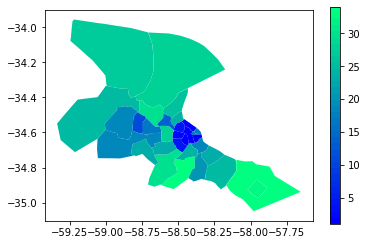

In [2]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import folium
import fiona
import pandas as pd
import re

# Cargar los drivers
fiona.drvsupport.supported_drivers['libkml'] = 'rw' 
fiona.drvsupport.supported_drivers['LIBKML'] = 'rw'

# Clusters
ruta_cluster_v2 = "C:\\Users\\jpinelli\\Apagado 2g\\CLUSTER V2.kml"

# Cargar polígonos desde el archivo KML de clusters
gdf_list = []
for layer in fiona.listlayers(ruta_cluster_v2) :    
    gdf = gpd.read_file(ruta_cluster_v2, driver='LIBKML', layer=layer)
    gdf_list.append(gdf)

poligonos = gpd.GeoDataFrame(pd.concat(gdf_list, ignore_index=True))

# Radiobases planificadas apagar
sitios_planificados = [
    'BN001', 'BN002', 'BN006', 'BN007', 'BN008', 'BN009', 'BN012', 'BN014', 'BN017', 'BN018',
    'BN019', 'BN020', 'BN021', 'BN023', 'BN024', 'BN025', 'BN026', 'BN029', 'BN032', 'BN033',
    'BN034', 'BN035', 'BN036', 'BN040', 'BN041', 'BN044', 'BN045', 'BN051', 'BN052', 'BN053',
    'BN057', 'BN058', 'BN060', 'BN061', 'BN062', 'BN065', 'BN066', 'BN067', 'BN069', 'BN071',
    'BN073', 'BN075', 'BN085', 'BN086', 'BN088', 'BN089', 'BN093', 'BN094', 'BN095', 'BN098',
    'BN099', 'BN101', 'BN104', 'BN105', 'BN106', 'BN107', 'BN109', 'BN110', 'BN114', 'BN115',
    'BN118', 'BN126', 'BN127', 'BN129', 'BN134', 'BN137', 'BN149', 'BN150', 'BN156', 'BN159',
    'BN160', 'BN161', 'BN163', 'BN166', 'BN169', 'BN176', 'BN178', 'BN180', 'BN191', 'BN210',
    'BN212', 'BN241', 'BN249', 'BN283', 'BN286', 'BN301', 'BN401', 'BN410', 'BN411', 'BN505',
    'BN511', 'BN922', 'BN923', 'BO001', 'BO003', 'BO004', 'BO005', 'BO008', 'BO009', 'BO010',
    'BO011', 'BO012', 'BO022', 'BO028', 'BO032', 'BO033', 'BO038', 'BO040', 'BO042', 'BO043',
    'BO044', 'BO046', 'BO047', 'BO050', 'BO052', 'BO054', 'BO055', 'BO056', 'BO057', 'BO058',
    'BO061', 'BO064', 'BO065', 'BO068', 'BO070', 'BO072', 'BO073', 'BO075', 'BO076', 'BO078',
    'BO079', 'BO082', 'BO083', 'BO084', 'BO086', 'BO087', 'BO088', 'BO090', 'BO091', 'BO092',
    'BO094', 'BO095', 'BO096', 'BO097', 'BO098', 'BO099', 'BO100', 'BO101', 'BO102', 'BO104',
    'BO105', 'BO107', 'BO110', 'BO112', 'BO113', 'BO115', 'BO116', 'BO117', 'BO118', 'BO119',
    'BO120', 'BO122', 'BO125', 'BO126', 'BO127', 'BO128', 'BO140', 'BO153', 'BO155', 'BO156',
    'BO159', 'BO162', 'BO165', 'BO174', 'BO180', 'BO181', 'BO182', 'BO183', 'BO187', 'BO188',
    'BO192', 'BO195', 'BO197', 'BO199', 'BO201', 'BO203', 'BO208', 'BO212', 'BO215', 'BO220',
    'BO223', 'BO234', 'BO244', 'BO253', 'BO259', 'BO260', 'BO263', 'BO266', 'BO267', 'BO269',
    'BO275', 'BO278', 'BO288', 'BO290', 'BO294', 'BO296', 'BO298', 'BO304', 'BO305', 'BO311',
    'BO312', 'BO321', 'BO323', 'BO324', 'BO329', 'BO340', 'BO344', 'BO378', 'BO446', 'BO489',
    'BO506', 'BO901', 'BO954', 'BS001', 'BS005', 'BS011', 'BS017', 'BS019', 'BS024', 'BS032',
    'BS034', 'BS035', 'BS036', 'BS040', 'BS041', 'BS042', 'BS043', 'BS044', 'BS046', 'BS047',
    'BS048', 'BS049', 'BS050', 'BS053', 'BS054', 'BS056', 'BS058', 'BS059', 'BS060', 'BS061',
    'BS062', 'BS063', 'BS065', 'BS071', 'BS073', 'BS075', 'BS079', 'BS082', 'BS085', 'BS093',
    'BS095', 'BS102', 'BS105', 'BS111', 'BS113', 'BS114', 'BS121', 'BS125', 'BS126', 'BS129',
    'BS137', 'BS152', 'BS158', 'BS159', 'BS160', 'BS164', 'BS170', 'BS172', 'BS175', 'BS177',
    'BS183', 'BS196', 'BS201', 'BS204', 'BS210', 'BS213', 'BS219', 'BS297', 'BS304', 'BS305',
    'BS346', 'BS374', 'BS385', 'CM001', 'CM002', 'CM003', 'CM004', 'CM005', 'CM010', 'CM012',
    'CM015', 'CM018', 'CM028', 'CM550', 'CM552', 'CU001', 'CU002', 'CU003', 'CU004', 'CU005',
    'CU006', 'CU007', 'CU008', 'CU009', 'CU011', 'CU012', 'CU014', 'CU015', 'CU016', 'CU017',
    'CU018', 'CU021', 'CU023', 'CU025', 'CU026', 'CU033', 'CU035', 'CU038', 'CU040', 'CU043',
    'CU046', 'CU063', 'CU081', 'CU503', 'CU538', 'CU591', 'CU592', 'CU668', 'CU680', 'CU693',
    'CU706', 'CU712', 'KN001', 'KN002', 'KN005', 'KN008', 'KN009', 'KN010', 'KN011', 'KN012',
    'KN015', 'KN024', 'KN036', 'KN037', 'KN042', 'KN043', 'KN045', 'KN047', 'KN049', 'KN053',
    'KN055', 'KN058', 'KN059', 'KN060', 'KN070', 'KN073', 'KN074', 'KN087', 'KN094', 'KN108',
    'KN109', 'KN110', 'KN111', 'KN117', 'KN120', 'KN154', 'KN155', 'KN159', 'KN160', 'KN163',
    'KN164', 'KN166', 'KN168', 'KN169', 'KN172', 'KN175', 'KN191', 'KN198', 'KN200', 'KN214',
    'KN217', 'KN232', 'KN303', 'KN323', 'KN352', 'KN370', 'KN523', 'KN528', 'KO001', 'KO002',
    'KO004', 'KO005', 'KO006', 'KO008', 'KO011', 'KO014', 'KO017', 'KO018', 'KO019', 'KO020',
    'KO021', 'KO024', 'KO025', 'KO026', 'KO027', 'KO032', 'KO037', 'KO041', 'KO042', 'KO045',
    'KO046', 'KO056', 'KO059', 'KO062', 'KO066', 'KO067', 'KO069', 'KO081', 'KO090', 'KO095',
    'KO111', 'KO112', 'KO374', 'KO506', 'KO518', 'KS001', 'KS006', 'KS007', 'KS008', 'KS010',
    'KS011', 'KS016', 'KS018', 'KS019', 'KS020', 'KS022', 'KS023', 'KS024', 'KS027', 'KS033',
    'KS034', 'KS035', 'KS040', 'KS042', 'KS043', 'KS046', 'KS048', 'KS049', 'KS050', 'KS051',
    'KS053', 'KS055', 'KS057', 'KS061', 'KS072', 'KS074', 'KS079', 'KS080', 'KS081', 'KS090',
    'KS094', 'KS098', 'KS103', 'KS105', 'KS115', 'KS116', 'KS117', 'KS126', 'KS131', 'KS132',
    'KS142', 'KS143', 'KS144', 'KS146', 'KS151', 'KS159', 'KS166', 'KS168', 'KS169', 'KS171',
    'KS176', 'KS177', 'KS178', 'KS183', 'KS189', 'KS192', 'KS193', 'KS195', 'KS198', 'KS204',
    'KS205', 'KS206', 'KS212', 'KS221', 'KS222', 'KS231', 'KS234', 'KS237', 'KS238', 'KS239',
    'KS242', 'KS243', 'KS268', 'KS269', 'KS273', 'KS275', 'KS287', 'KS300', 'KS308', 'KS314',
    'KS315', 'KS325', 'KS375', 'KS425', 'KS426', 'KS447', 'KS451', 'KS454', 'KS470', 'KS471',
    'LC001', 'LC002', 'LC003', 'LC004', 'LC005', 'LC007', 'LC008', 'LC013', 'LC014', 'LC022',
    'LC023', 'LC025', 'LC029', 'LC034', 'LC035', 'LC037', 'LC038', 'LC040', 'LC043', 'LC044',
    'LC059', 'LP001', 'LP002', 'LP003', 'LP005', 'LP006', 'LP008', 'LP013', 'LP015', 'LP020',
    'LP021', 'LP024', 'LP025', 'LP027', 'LP028', 'LP030', 'LP031', 'LP033', 'LP034', 'LP035',
    'LP036', 'LP037', 'LP038', 'LP040', 'LP041', 'LP044', 'LP045', 'LP048', 'LP052', 'LP054',
    'LP055', 'LP056', 'LP057', 'LP058', 'LP066', 'LP073', 'LP074', 'LP075', 'LP078', 'LP081',
    'LP086', 'LP095', 'LP109', 'LP110', 'LP136', 'MAQ05'
]

radiobases = pd.read_csv("radiobases.csv")
radiobases = gpd.GeoDataFrame(
    radiobases, geometry=gpd.points_from_xy(radiobases.longitud, radiobases.latitud), crs="EPSG:4326"
)
radiobases = radiobases[['sitio','geometry']].drop_duplicates()
radiobases_planificadas = radiobases[radiobases['sitio'].isin(sitios_planificados)].drop_duplicates()

# 1. Identificar rb dentro de polígonos de interés
poligonos_interes = poligonos[poligonos['Name'].str.contains('AS|AN|AO|^A-La |^A-City ')]
poligonos_interes= poligonos_interes[['Name','geometry']]
rb_en_poligonos_interes = gpd.sjoin(poligonos_interes, radiobases_planificadas, how="left", predicate='intersects')

# Agrupar por cluster y contar la cantidad de radiobases en cada uno
rb_por_cluster = rb_en_poligonos_interes.groupby('Name')['Name'].count().reset_index(name='sitios')

# Mostrar el resultado
# print(rb_por_cluster)
# 3. Asignar colores según la cantidad de puntos
colores = plt.cm.get_cmap('winter', len(rb_por_cluster))

# 4. Representar gráficamente los polígonos coloreados
poligonos_interes = poligonos_interes.merge(rb_por_cluster, left_on='Name', right_on='Name', how='left')
poligonos_interes.plot(column='sitios', cmap=colores, legend=True)
plt.show()


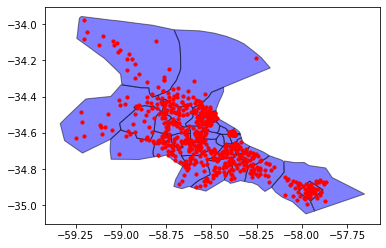

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Supongamos que tienes GeoDataFrames llamados 'puntos' y 'poligonos_interes'

# Crear una figura y ejes
fig, ax = plt.subplots()

# Graficar polígonos
poligonos_interes.plot(ax=ax, color='blue', alpha=0.5, edgecolor='k', label='Name')

# Graficar puntos
radiobases_planificadas.plot(ax=ax, color='red', markersize=10)

# Ajustar el aspecto del mapa si es necesario
ax.set_aspect('equal')  # Esto asegura que los ejes tengan la misma escala

# Mostrar el mapa
plt.show()


In [6]:
gdf = gpd.read_file('Poligono_AMBA_ARG.kmz')

In [8]:
gdf

,Name,description,timestamp,begin,end,altitudeMode,tessellate,extrude,visibility,drawOrder,icon,geometry
0,MapInfo Saved Objects,"<br><br><br>\n <table border=""1"" padding=""0...",NaT,NaT,NaT,NaN,1,1,-1,NaN,NaN,"POLYGON Z ((-58.44352 -34.32601 0.00000, -58.4..."


In [9]:
df=pd.read_excel('kpis.xlsx')
df

,Cluster,kpi1,kpi2,kpi3,fecha
0,AN-Aeroparque,0.171615,55.205390,4.5,2024-01-01
1,AN-San Isidro,0.778367,2.470289,6.0,2024-01-01
2,AN-Benavidez,0.285995,47.532020,5.3,2024-01-01
3,AN-Polvorines,0.606691,42.719212,8.9,2024-01-01
4,AN-Olivos,0.878032,90.753417,8.1,2024-01-01
...,...,...,...,...,...
95,AN-Campana,0.638636,13.139653,90.8,2024-03-04
96,AN-Lujan,0.002263,14.460699,95.3,2024-03-04
97,AN-Villa Urquiza,0.477070,94.459926,97.5,2024-03-04
98,AN-Villa Ballester,0.329317,51.271301,96.0,2024-03-04


In [199]:
import plotly.express as px

df['fecha_str'] = df['fecha'].dt.strftime('%Y-%m-%d')
pols = poligonos_interes[['Name','geometry']].set_index('Name').to_json()
# Create a TimeSliderChoropleth
fig = px.choropleth_mapbox(data_frame = df,
                           geojson = json.loads(pols),
                           locations=df.Cluster,
                           center={'lat':-34.61315, 'lon':-58.37723},
                           zoom=7,
                           color='kpi3',
                           range_color=(0, 100),
                           mapbox_style='open-street-map',
                           color_continuous_scale='blues',
                           animation_frame='fecha_str',
                           width=800,
                           height=600,
                           hover_name='Cluster',
                           hover_data=['kpi1','kpi2'])

fig.write_html('Reporte de monitoreo.html')


In [10]:
import pandas as pd
import geopandas as gpd

radiobases = pd.read_csv("radiobases_sin_null.csv")
radiobases = gpd.GeoDataFrame(
    radiobases, geometry=gpd.points_from_xy(radiobases.longitud, radiobases.latitud), crs="EPSG:4326"
)
radiobases = radiobases[['sitio', 'subregion', 'geometry']].to_crs("EPSG:32614")
radiobases.geometry=radiobases.geometry.buffer(250)
radiobases = radiobases.to_crs(crs='EPSG:4326').drop_duplicates()
traf=pd.read_csv('traf sit 2.csv', sep=',')
traf['fecha'] = pd.to_datetime(traf['fecha'], format='%Y-%m-%d %H:%M:%S')
traf['fecha'] = traf['fecha'].dt.strftime('%Y-%m-%d %H')
radiobases_filtradas = radiobases[radiobases['sitio'].isin(traf.sitio)]


In [ ]:
import plotly.express as px
import json

for subregions in radiobases_filtradas.subregion.unique():
    radiobases_filtradas2=radiobases_filtradas[radiobases_filtradas.subregion==subregions]
    traf2 = traf[traf.subregion==subregions].sort_values(by='fecha', ascending=True)
    pols = radiobases_filtradas2[['sitio','geometry']].set_index('sitio').to_json()
    centroide = radiobases_filtradas2.unary_union.centroid
    lat_centroide, lon_centroide = centroide.y, centroide.x
    # Create a TimeSliderChoropleth
    fig = px.choropleth_mapbox(data_frame = traf2,
                               geojson = json.loads(pols),
                               locations=traf2.sitio,
                               center={'lat':lat_centroide, 'lon':lon_centroide},
                               zoom=8,
                               color='b',
                               range_color=(0, traf2.b.max()),
                               mapbox_style='open-street-map',
                               color_continuous_scale='blues',
                               animation_frame='fecha',
                               width=1000,
                               height=600,
    #                            hover_name='Cluster',
                               hover_data=['up','down'])

    fig.write_html(f'Reporte de monitoreo_{subregions}.html')

# fig.show()

  Image 1 captured. (elapsed time: 0.0 min; 28 sec)
  Image 2 captured. (elapsed time: 0.0 min; 35 sec)
  Image 3 captured. (elapsed time: 0.0 min; 42 sec)
  Image 4 captured. (elapsed time: 0.0 min; 48 sec)
  Image 5 captured. (elapsed time: 0.0 min; 56 sec)
  Image 6 captured. (elapsed time: 1.0 min; 2 sec)
  Image 7 captured. (elapsed time: 1.0 min; 11 sec)
  Image 8 captured. (elapsed time: 1.0 min; 17 sec)
  Image 9 captured. (elapsed time: 1.0 min; 24 sec)
  Image 10 captured. (elapsed time: 1.0 min; 31 sec)
  Image 11 captured. (elapsed time: 1.0 min; 39 sec)
  Image 12 captured. (elapsed time: 1.0 min; 44 sec)
  Image 13 captured. (elapsed time: 1.0 min; 51 sec)
  Image 14 captured. (elapsed time: 1.0 min; 58 sec)
  Image 15 captured. (elapsed time: 2.0 min; 5 sec)
  Image 16 captured. (elapsed time: 2.0 min; 12 sec)
  Image 17 captured. (elapsed time: 2.0 min; 18 sec)
  Image 18 captured. (elapsed time: 2.0 min; 26 sec)
  Image 19 captured. (elapsed time: 2.0 min; 33 sec)
  Im

  Image 32 captured. (elapsed time: 25.0 min; 51 sec)
  Image 33 captured. (elapsed time: 26.0 min; 38 sec)
  Image 34 captured. (elapsed time: 27.0 min; 23 sec)
  Image 35 captured. (elapsed time: 28.0 min; 10 sec)
  Image 36 captured. (elapsed time: 28.0 min; 57 sec)
  Image 37 captured. (elapsed time: 29.0 min; 45 sec)
  Image 38 captured. (elapsed time: 30.0 min; 36 sec)
  Image 39 captured. (elapsed time: 31.0 min; 33 sec)
